In [12]:
import numpy as np

data = np.array([1, 3, 9, 2, 4, 0, 1, 5, -2, 12])
np.quantile(data, 0.7)

4.3

In [11]:
from scipy.special import comb

comb(N=len(data), k=1) * (0.3) ** 1 * (0.7) ** (len(data) - 1) + comb(N=len(data), k=0) * (0.3) ** 0 * (0.7) ** (
    len(data))

0.14930834589999992

In [22]:
res = 0
for i in range(100):
    res += comb(N=1000, k=i) * (0.3) ** i * (0.7) ** (1000 - i)
res

4.43294355561438e-53

In [19]:
from scipy.stats import binom

binom.cdf(k=100, n=1000, p=0.3)

1.7183404003299047e-52

In [20]:
binom.pmf(k=100, n=1000, p=0.3)

1.2750460447683011e-52

In [30]:
from scipy.stats import norm

norm.ppf(0.025, loc=0, scale=1), norm.cdf(3, loc=0, scale=1) * 100

(-1.9599639845400545, 99.86501019683699)

In [36]:
mean = 25
sigma = 7
N = 63

se = sigma / np.sqrt(N)

mean - 1.96 * se, mean + 1.96 * se

(23.271442476771135, 26.728557523228865)

Почему мы можем использовать нормальное распределение:


Центральная предельная теорема (ЦПТ): Согласно центральной предельной теореме, если размер выборки достаточно большой (обычно считается, что n≥30 достаточно), то распределение выборочного среднего будет стремиться к нормальному, даже если исходные данные распределены не по нормальному закону. У нас 63 примера, что больше 30, поэтому мы можем полагаться на ЦПТ.

Известное стандартное отклонение (σ): В задаче указано, что стандартное отклонение известно заранее. Это делает ситуацию похожей на работу с генеральной совокупностью, где применимо нормальное распределение. В случае, если бы мы не знали стандартное отклонение и его пришлось бы оценивать по выборке, стоило бы использовать t-распределение Стьюдента, которое лучше подходит для малых выборок.

Рассуждение о стандартизации: Стандартизация данных требуется в случаях, когда мы сравниваем разные выборки или данные с различными шкалами. Однако в данном контексте это не требуется, так как у нас уже есть среднее и стандартное отклонение для построения доверительного интервала для одного набора данных.

In [42]:
from scipy.stats import t

N = 25
mean = 170
std = 12

se = std / np.sqrt(N)

mean + se * t.ppf(0.025, df=N - 1), mean + se * t.ppf(0.975, df=N - 1)

(165.04664345209275, 174.95335654790725)

Здесь есть фокус — так как мы не знаем истинного значения стандартного отклонения, лучше использовать распределение Стьюдента.

Для оценки доверительного интервала при использовании распределения Стьюдента мы предполагаем, что выборка взята из нормально распределенной генеральной совокупности. Однако, даже если у нас нет уверенности в нормальности исходных данных, согласно Центральной предельной теореме, для достаточно большого размера выборки (обычно считается достаточным размер около 30 и больше) распределение выборочной средней стремится к нормальному, независимо от формы исходного распределения.

В данной задаче у нас есть выборка из 25 магазинов, и хотя это немного меньше 30, использование распределения Стьюдента оправдано тем, что его хвосты шире, и он более "щадящий" по отношению к малым выборкам, особенно когда генеральное

(0.9136749185987014, 49.706162540700646, 50.61983745929935)

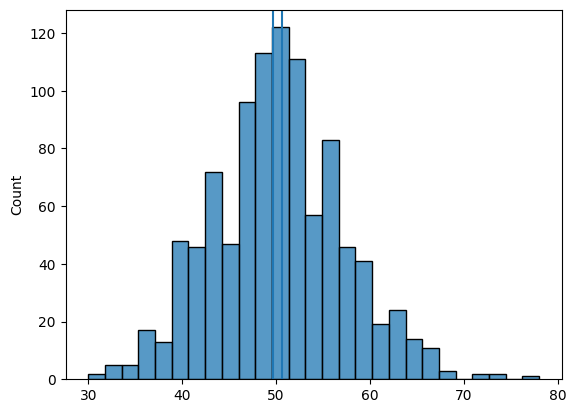

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.poisson(lam=50, size=1000)
se = data.std() / np.sqrt(1000)

a = data.mean() + se * t.ppf(0.025, df=N - 1)
b = data.mean() + se * t.ppf(0.975, df=N - 1)

sns.histplot(data)
plt.axvline(a)
plt.axvline(b)

abs(a - b), a, b

(6.695072037054808, 7.327968710357009)

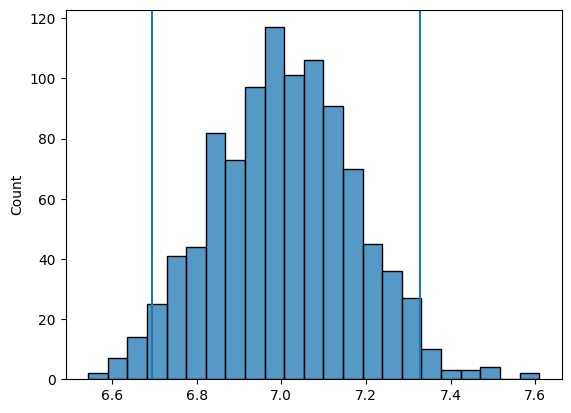

In [95]:
bs_std_data = []
for _ in range(1000):
    bs_std_data.append(np.random.choice(a=data, size=1000, replace=True).std())

q1 = np.quantile(bs_std_data, 0.025)
q2 = np.quantile(bs_std_data, 0.975)

sns.histplot(bs_std_data)
plt.axvline(q1)
plt.axvline(q2)

q1, q2

In [90]:
from scipy.stats import bootstrap

bootstrap(
    data=(data,),
    statistic=np.std,
    confidence_level=0.95,
    n_resamples=1000,
    method='percentile'
).confidence_interval

ConfidenceInterval(low=6.688579719970224, high=7.344477299187267)

(0.5042219211866612, 1.128741276391879)

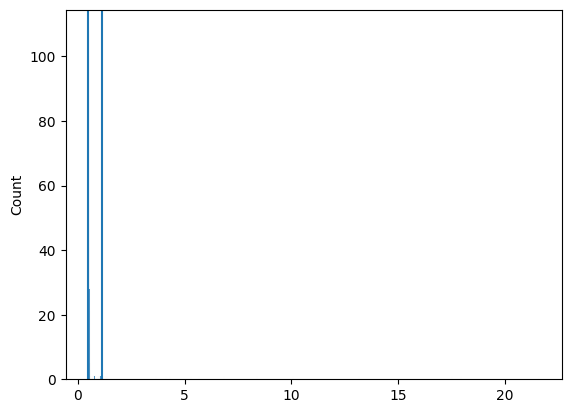

In [137]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

res = []
for _ in range(1000):
    train_index = np.random.choice(X.index, size=X.shape[0], replace=True)
    test_index = np.setdiff1d(X.index, train_index)

    X_train, y_train = X.iloc[train_index, :], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index, :], y.iloc[test_index]

    model = Ridge()
    model.fit(X_train, y_train)
    res.append(mean_squared_error(model.predict(X_test), y_test))

q1 = np.quantile(res, 0.025)
q2 = np.quantile(res, 0.975)

sns.histplot(res)
plt.axvline(q1)
plt.axvline(q2)

q1, q2

In [143]:
def generate_norm_dist():
    return np.random.normal(loc=3, scale=4, size=1000)

In [162]:
res = []
for _ in range(1000):
    norm_dist = generate_norm_dist()

    q1 = norm_dist.mean() + norm_dist.std() / np.sqrt(1000) * t.ppf(0.025, df=1000 - 1)
    q2 = norm_dist.mean() + norm_dist.std() / np.sqrt(1000) * t.ppf(0.975, df=1000 - 1)
    res.append(q1 <= 3 <= q2)

np.mean(res)

0.954